In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pickle import load
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime

from eoles.write_output import comparison_simulations, comparison_simulations_new, plot_typical_week, plot_typical_demand, plot_residual_demand
from project.write_output import plot_compare_scenarios

In [22]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=1.3)
dict_output = {
     # '': {
     #    "Ambitious": os.path.join("eoles/outputs/20231210/1211010909_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyambitious"),
     #    "Ban": os.path.join("eoles/outputs/20231210/1211004148_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyban"),
     #    "Ban no policy": os.path.join("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy"),
     #     "Ban ref": os.path.join("eoles/outputs/20231210/1211010852_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybanref"),
     #   # "Carbon tax": os.path.join("eoles/outputs/20231210/1211012604_biogasS3_capacityN1_demandReindustrialisation_profileReference_policycarbontax"),
     #    # "Reference": os.path.join("eoles/outputs/20231210/1211010746_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyreference"),
     # },
         '': {
        "Ambitious": os.path.join("eoles/outputs/20231210/1211004316_biogasS3_capacityN1_demandReference_profileReference_policyambitious"),
        "Ban": os.path.join("eoles/outputs/20231210/1210235222_biogasS3_capacityN1_demandReference_profileReference_policyban"),
        "Ban no policy": os.path.join("eoles/outputs/20231210/1210235104_biogasS3_capacityN1_demandReference_profileReference_policybannopolicy"),
         "Ban ref": os.path.join("eoles/outputs/20231210/1211001733_biogasS3_capacityN1_demandReference_profileReference_policybanref"),
        "Carbon tax": os.path.join("eoles/outputs/20231210/1211010310_biogasS3_capacityN1_demandReference_profileReference_policycarbontax"),
        "Reference": os.path.join("eoles/outputs/20231210/1211004541_biogasS3_capacityN1_demandReference_profileReference_policyreference"),
     },
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"].rename(columns={2049:2050})

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/122023_ban")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=True, secondary_y='Proportional',
    secondary_axis_spec={'y_min': 0, 'y_max': 120, 'title': 'Subsidies (€/TWh)'})

# # # Plots ResIRF
# # # Problem to solve
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True, reference=" Reference")

KeyError: 'Efficiency subsidies insulation (euro/kWh standard)'

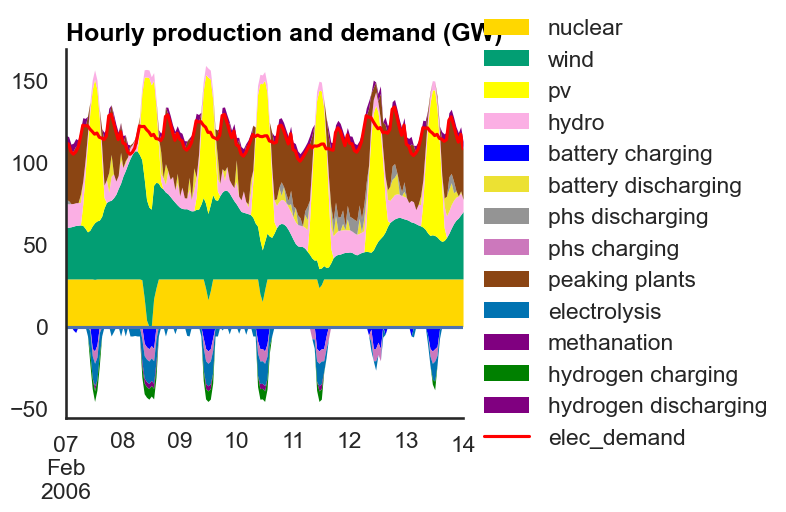

In [2]:
sns.set_theme(context="talk", style="white")

hourly_generation = pd.read_csv("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 2, 7, 0, 0), datetime.datetime(2006, 2, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

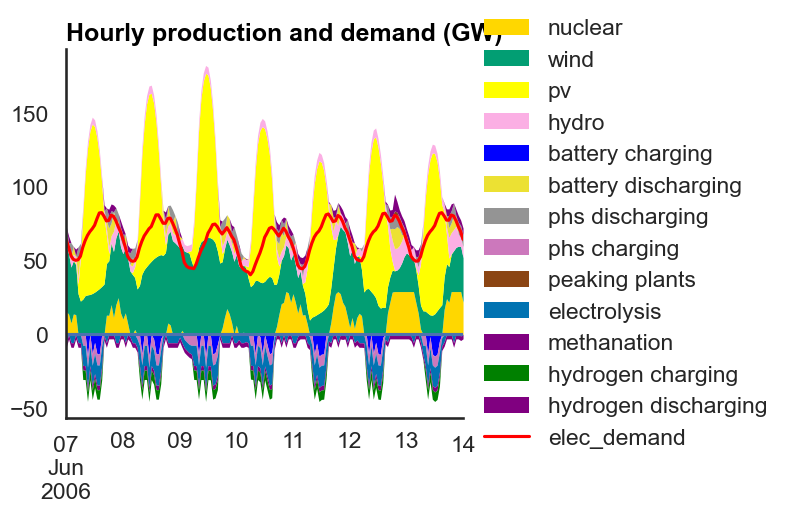

In [4]:
date_start, date_end = datetime.datetime(2006, 6, 7, 0, 0), datetime.datetime(2006, 6, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [5]:
hourly_generation.loc[(hourly_generation.hydrogen_in > 0) & (hourly_generation.hydrogen > 0)]

,hour,demand,offshore_f,offshore_g,onshore,pv_g,pv_c,river,lake,methanization,...,CH4_demand,H2_demand,heat_elec,heat_gas,electrolysis_elec,methanation_elec,carbon_content,carbon_content_heat,date,date_only


<AxesSubplot:>

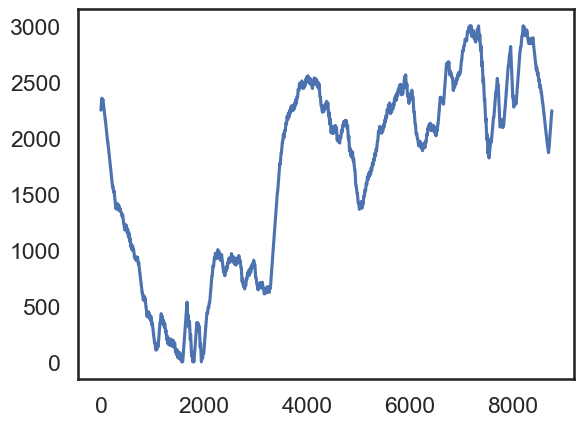

In [18]:
hourly_generation.hydrogen_charge.plot()

<AxesSubplot:>

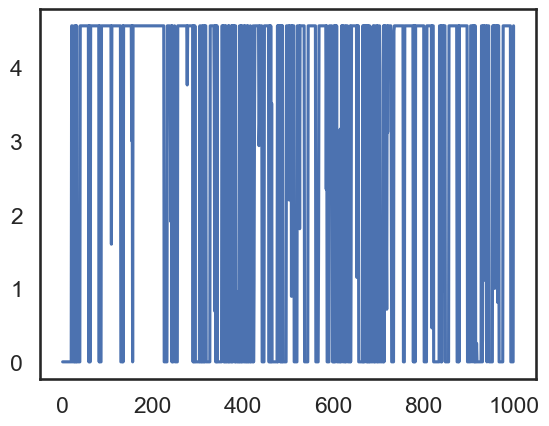

In [19]:
hourly_generation.hydrogen.iloc[0:1000].plot()

<AxesSubplot:>

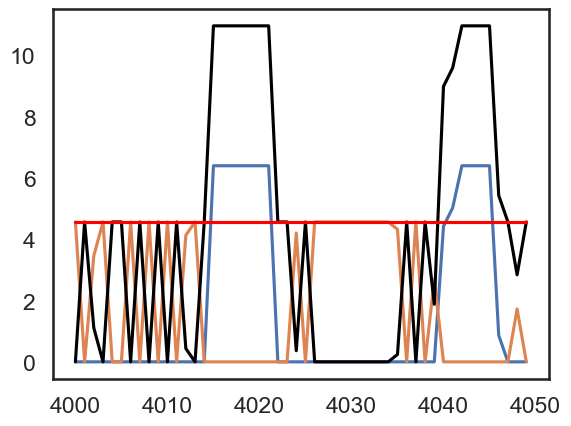

In [19]:
begin, end = 4000, 4050
hourly_generation.hydrogen_in.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.hydrogen.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.electrolysis.iloc[begin:end].plot(c='black', label='electrolysis')
hourly_generation.H2_demand.iloc[begin:end].plot(c='red')

In [24]:
hourly_generation.hydrogen_in.describe()

count    8760.000000
mean        2.090226
std         2.941354
min         0.000000
25%         0.000000
50%         0.000000
75%         6.400000
max         6.400000
Name: hydrogen_in, dtype: float64